<a href="https://colab.research.google.com/github/iclx/AnnoCerv/blob/main/data_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset processing demonstration
### by David Iclanzan
contact: iclanzan@ms.sapientia.ro


In [1]:
# Download the dataset
!git clone https://github.com/iclx/AnnoCerv.git

Cloning into 'AnnoCerv'...
remote: Enumerating objects: 930, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 930 (delta 4), reused 9 (delta 1), pack-reused 911
Receiving objects: 100% (930/930), 1.43 GiB | 22.99 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (833/833), done.


In [2]:
# List the cases
!ls AnnoCerv/dataset/

'Case 1'    'Case 20'  'Case 32'  'Case 44'  'Case 56'	'Case 68'  'Case 8'   'Case 91'
'Case 10'   'Case 21'  'Case 33'  'Case 45'  'Case 57'	'Case 69'  'Case 80'  'Case 92'
'Case 100'  'Case 22'  'Case 34'  'Case 46'  'Case 58'	'Case 7'   'Case 81'  'Case 93'
'Case 11'   'Case 23'  'Case 35'  'Case 47'  'Case 59'	'Case 70'  'Case 82'  'Case 94'
'Case 12'   'Case 24'  'Case 36'  'Case 48'  'Case 6'	'Case 71'  'Case 83'  'Case 95'
'Case 13'   'Case 25'  'Case 37'  'Case 49'  'Case 60'	'Case 72'  'Case 84'  'Case 96'
'Case 14'   'Case 26'  'Case 38'  'Case 5'   'Case 61'	'Case 73'  'Case 85'  'Case 97'
'Case 15'   'Case 27'  'Case 39'  'Case 50'  'Case 62'	'Case 74'  'Case 86'  'Case 98'
'Case 16'   'Case 28'  'Case 4'   'Case 51'  'Case 63'	'Case 75'  'Case 87'  'Case 99'
'Case 17'   'Case 29'  'Case 40'  'Case 52'  'Case 64'	'Case 76'  'Case 88'   swede_scores.csv
'Case 18'   'Case 3'   'Case 41'  'Case 53'  'Case 65'	'Case 77'  'Case 89'
'Case 19'   'Case 30'  'Case 42'  'Case 54'  'C

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Base directory path
base_path = "./AnnoCerv/dataset/"

In [12]:
# Statistics counters
iodine_count = 0
green_count = 0
atypical_count = 0
junction_not_visible_count = 0
junction_not_visible_cases = list()


# Pixel color definitions
colors = {
    'blue': (0, 0, 255),  # squamous-cylindrical junction
    'purple': (255, 0, 255)  # aceto white area
    # other colors encode anomalies such as atypical vessels,
    # punctations, mosaics, Naboth cysts, cuffed gland openings, polyps
}

In [ ]:
# Iterate through each folder (case)
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)

    print(f'Processing folder {folder}')

    if os.path.isdir(folder_path):
        iodine_present = False
        green_present = False
        blue_absent = True
        atypical_regions = 0

        # Check for image types and corresponding annotations
        for file in os.listdir(folder_path):
            print(f'\tProcessing {file}')
            if "Iod" in file and file.endswith(".jpg"):
                iodine_present = True
            elif "Green" in file and file.endswith(".jpg"):
                green_present = True
            elif "Aceto" in file and file.endswith(".jpg"):
                annotation_file = os.path.join(folder_path, file.replace(".jpg", ".png"))

                if os.path.exists(annotation_file):
                    img = Image.open(annotation_file)
                    pixels = list(img.getdata())

                    for pixel in pixels:
                        # Check for transparency (Alpha channel)
                        if len(pixel) == 4 and pixel[3] > 0:
                            if pixel[:3] == colors['blue']:
                                blue_absent = False
                            elif pixel[:3] != colors['purple']:
                                atypical_regions += 1

        # Update statistics
        if iodine_present:
            iodine_count += 1
        if green_present:
            green_count += 1
        if blue_absent:
            junction_not_visible_count += 1
            junction_not_visible_cases.append(folder)
        if atypical_regions > 0:
            atypical_count += 1


Processing folder Case 46
	Processing C46Iod (1).jpg
	Processing C46Aceto (2).jpg
	Processing C46Aceto (1).png
	Processing C46Aceto (2).png
	Processing C46Iod (2).jpg
	Processing C46Aceto (1).jpg
Processing folder Case 39
	Processing C39Aceto (2).png
	Processing C39Aceto (1).jpg
	Processing C39Iod (2).jpg
	Processing C39Iod (1).jpg
	Processing C39Aceto (1).png
	Processing C39Aceto (2).jpg
	Processing C39Iod (3).jpg
Processing folder Case 19
	Processing C19Iod (1).jpg
	Processing C19Aceto (3).jpg
	Processing C19Aceto (2).png
	Processing C19Aceto (3).png
	Processing C19Aceto (1).jpg
	Processing C19Aceto (1).png
	Processing C19Iod (2).jpg
	Processing C19Aceto (2).jpg
	Processing C19Iod (3).jpg
Processing folder Case 89
	Processing C89Aceto (1).png
	Processing C89Iod (1).jpg
	Processing C89Aceto (3).png
	Processing C89Aceto (2).jpg
	Processing C89Aceto (1).jpg
	Processing C89Aceto (2).png
	Processing C89Aceto (3).jpg
Processing folder Case 35
	Processing C35Iod (2).jpg
	Processing C35Green

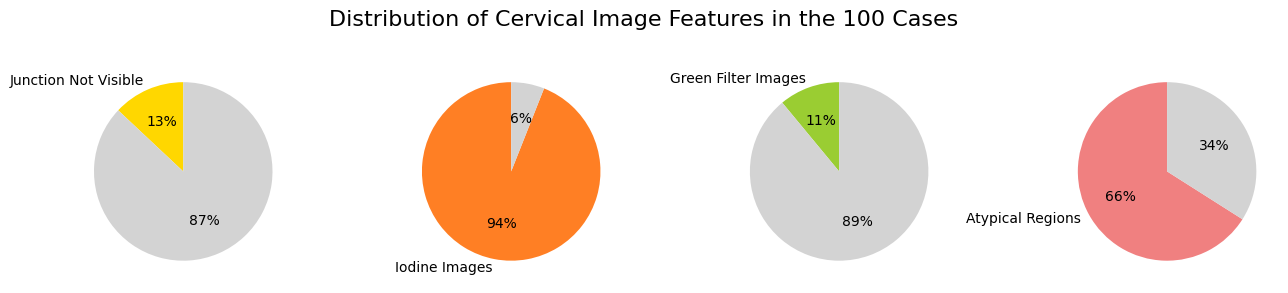

In [15]:
# Display statistics
fig, ax = plt.subplots(1, 4, figsize=(13, 3))

stats = [junction_not_visible_count, iodine_count, green_count, atypical_count]
titles = ["Junction Not Visible", "Iodine Images", "Green Filter Images", "Atypical Regions"]

# Create data for pie chart for consistent appearance
labels = titles
sizes = stats
colors = ['gold', '#FF7F24', 'yellowgreen', 'lightcoral']
for i, (size, title, color) in enumerate(zip(sizes, titles, colors)):
    ax[i].pie([size, 100-size], labels=[title, ""], colors=[color, 'lightgray'], startangle=90, autopct='%1.0f%%')
    # ax[i].set_title(title)


# Add a title for the entire plot
fig.suptitle("Distribution of Cervical Image Features in the 100 Cases", fontsize=16)

# Save the figure as a PDF
fig.savefig("cervical_image_features_distribution.pdf")

plt.tight_layout()
plt.show()


In [16]:
print(f'Cases where the squamous-cylindrical junction is not visible: {junction_not_visible_cases}')

Cases where the squamous-cylindrical junction is not visible: ['Case 96', 'Case 95', 'Case 79', 'Case 100', 'Case 30', 'Case 2', 'Case 9', 'Case 97', 'Case 94', 'Case 32', 'Case 98', 'Case 5', 'Case 99']


## Swede score analysis

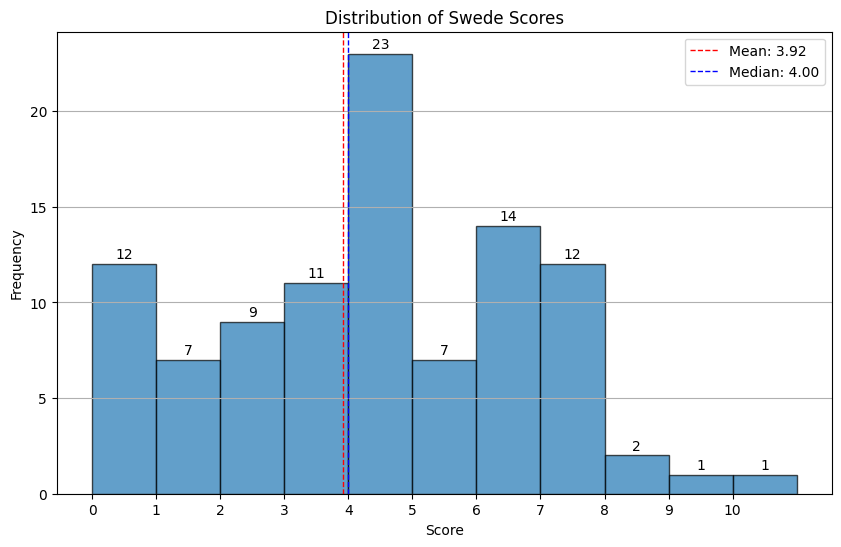

Mean Score: 3.92
Median Score: 4.00
Standard Deviation: 2.40


In [22]:
import pandas as pd

# Load the CSV file
file_path = "AnnoCerv/dataset/swede_scores.csv"  # Replace this with the path to your file if different
data = pd.read_csv(file_path)


scores = data.iloc[:, 0]

# Plot histogram
plt.figure(figsize=(10, 6))
# bins from 0-10 inclusive
hist_values, bin_edges, patches = plt.hist(scores, bins=range(12), edgecolor='black', alpha=0.7)
plt.title('Distribution of Swede Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(11))
plt.grid(axis='y')


# Display frequencies on top of the bars
for value, patch in zip(hist_values, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.5, int(value),
             ha='center', va='center')

# Display statistics
mean_score = scores.mean()
median_score = scores.median()
std_dev = scores.std()

plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_score:.2f}')
plt.legend()

# Save the plot to a PDF file
plt.savefig("swede_hist.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Print statistics
print(f"Mean Score: {mean_score:.2f}")
print(f"Median Score: {median_score:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")